In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib import cm

In [4]:
def h(x, theta):
    return np.dot(x, theta.reshape(x.shape[1], 1))

In [5]:
def mean_squared_error(y_predicted, y_label):
    return np.sqrt(((y_predicted - y_label) ** 2).mean())

In [6]:
class LeastSquaresRegression():
    def __init__(self):
        self.theta_ = None

    def fit(self, X, y):
        self.theta_ = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

    def predict(self, X):
        return h(X, self.theta_)

In [7]:
# Generate random data
X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)

In [8]:
def bias_column(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

X_new = bias_column(X)
print(X[:5])
print(" ---- ")
print(X_new[:5])

model = LeastSquaresRegression()
model.fit(X_new, y)
print("Theta values:", model.theta_)
y_new = model.predict(X_new)

[[2.14069822]
 [0.99849262]
 [0.64398863]
 [1.97081696]
 [1.53083999]]
 ---- 
[[1.         2.14069822]
 [1.         0.99849262]
 [1.         0.64398863]
 [1.         1.97081696]
 [1.         1.53083999]]
Theta values: [[9.82637452]
 [2.0515624 ]]


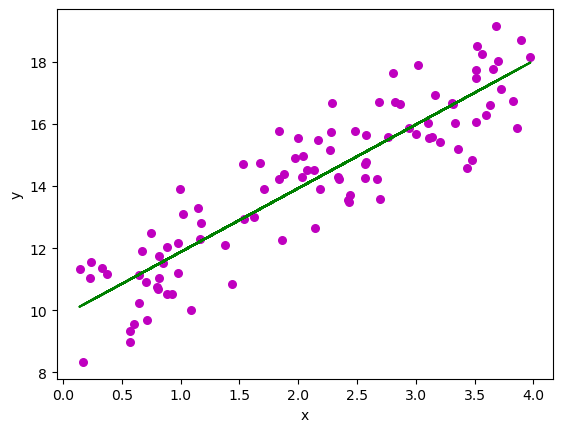

In [10]:
def my_plot(X, y, y_new):
    plt.scatter(X, y, color="m", marker="o", s=30)
    plt.plot(X, y_new, color="g")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

my_plot(X, y, y_new)

In [12]:
class GradientDescentOptimizer():
    def __init__(self, f, fprime, start, learning_rate=0.1):
        self.f_ = f                       # The function
        self.fprime_ = fprime              # The gradient of f
        self.current_ = start              # The current point being evaluated
        self.learning_rate_ = learning_rate  # Learning rate parameter

        # Save history as attributes
        self.history_ = [start]

    def step(self):
        # Take a gradient descent step
        # 1. Compute the new value and update self.current_
        # 2. Append the new value to history
        # Does not return anything
        new_value = self.current_ - (self.learning_rate_ * self.fprime_(self.current_))
        self.current_ = new_value
        self.history_.append(self.current_)

    def optimize(self, iterations=100):
        # Use gradient descent to get closer to the minimum:
        # For each iteration, take a gradient step
        for i in range(iterations):
            self.step()

    def getCurrentValue(self):
        # Getter for current_
        return self.current_

    def print_result(self):
        print("Best theta found is " + str(self.current_))
        print("Value of f at this theta: f(theta) = " + str(self.f_(self.current_)))
        print("Value of f prime at this theta: f'(theta) = " + str(self.fprime_(self.current_)))

In [13]:
def f(x):
    return -np.exp(-(x - 0.7) ** 2)

def f_prime(x):
    return 2 * x - np.array([4, 12])

grad = GradientDescentOptimizer(f, f_prime, np.random.normal(size=(2,)), 0.1)
grad.optimize(10)
grad.print_result()

Best theta found is [1.78261113 5.22488319]
Value of f at this theta: f(theta) = [-3.09732315e-01 -1.28235464e-09]
Value of f prime at this theta: f'(theta) = [-0.43477774 -1.55023362]


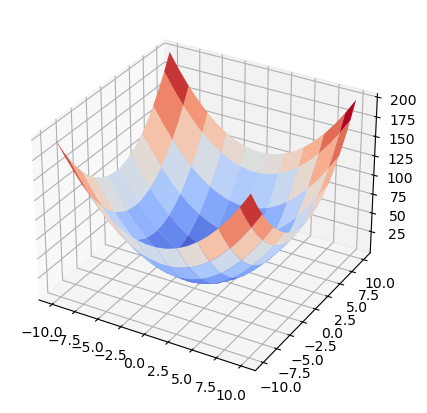

In [14]:
# 3D plot of quadratic function
a = np.linspace(-10, 10, 20)
b = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(a, b)
Z = X ** 2 + Y ** 2

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='b', alpha=0.1)
surface = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, rstride=2, cstride=2)
plt.show()

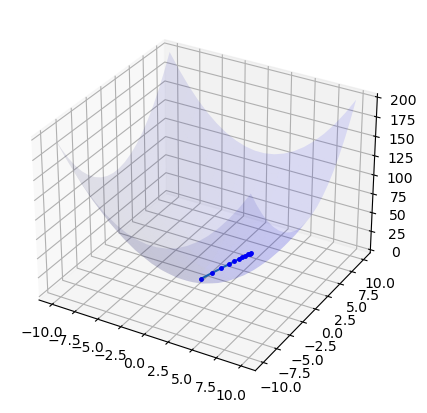

In [16]:
# 3D plot with gradient descent path
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='b', alpha=0.1)
ax.plot([t[0] for t in grad.history_], [t[1] for t in grad.history_], markerfacecolor='b', markeredgecolor='b', marker='.', markersize=5)
plt.show()